In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as plt

In [4]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""

    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [5]:
WildLifeData = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_b9c96895_3ee1_4c36_9da5_81342009fb95',
  'project_id':'3bab2f88b07d441bacd9bb0e1a5e7cda',
  'region':'dallas',
  'user_id':'2d744441cf45457b93268d97912da96b',
  'domain_id':'6cfe71447c1349bbbf65fb2fe9f2ceb7',
  'domain_name':'1141853',
  'username':'admin_41692749ed5d1737ed313cb0ae413c678273b8e1',
  'password':"""Ncihv},NGLtm9BU6""",
  'filename':'wildlife.csv',
  'container':'notebooks',
  'tenantId':'s17d-64313c0aeaf5ab-f9f64455640b'
}

In [6]:
import requests, StringIO, pandas as pd, json, re

In [7]:
content_string = get_file_content(WildLifeData)

In [43]:
dataFrame = pd.read_csv(content_string)

ValueError: No columns to parse from file

In [9]:
dataFrame.head(5)

,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPID,OPERATOR,ATYPE,TYPE_ENG,SPECIES_ID,SPECIES,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,3/30/2016 0:00,CA,KMHR,SACRAMENTO MATHER ARPT,HGT,GMJ AIR SHUTTLE,EMB-145,D,ZX3,Sparrows,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Air Transport Operations,NaN,NaN,9/1/2016 0:00,False,False
1,12/21/2015 0:00,CA,KAPC,NAPA COUNTY ARPT,BUS,BUSINESS,CITATION X,D,N6024,Least sandpiper,...,Deleted,Deleted,NaN,Multiple,Tower,NaN,NaN,7/8/2016 0:00,False,False
2,7/16/2015 0:00,CA,KVNY,VAN NUYS ARPT,BUS,BUSINESS,CITATION X,D,K5114,American kestrel,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Airport Operations,NaN,NaN,NaN,False,False
3,7/12/2015 0:00,CA,KSMF,SACRAMENTO INTL,CPZ,COMPASS AIRLINES,EMB-145,D,YI009,Cliff swallow,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Airport Operations,NaN,NaN,NaN,False,False
4,7/10/2015 0:00,CA,KMHR,SACRAMENTO MATHER ARPT,HGT,GMJ AIR SHUTTLE,EMB-145,D,UNKBM,Unknown bird - medium,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Airport Operations,NaN,NaN,NaN,False,False


In [10]:
dataFrame.tail(5)

,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPID,OPERATOR,ATYPE,TYPE_ENG,SPECIES_ID,SPECIES,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
13578,5/28/1990 0:00,CA,KRHV,REID-HILLVIEW ARPT OF SANTA CLARA CNTY,UNK,UNKNOWN,C-177,A,UNKBM,Unknown bird - medium,...,Deleted,Deleted,NaN,FAA Form 5200-7,NaN,NaN,NaN,3/8/1999 0:00,False,False
13579,5/23/1990 0:00,CA,KSFO,SAN FRANCISCO INTL ARPT,DAL,DELTA AIR LINES,B-767,D,UNKBM,Unknown bird - medium,...,Deleted,Deleted,5/23/1990 0:00,FAA Form 5200-7,Other,NaN,NaN,3/8/1999 0:00,False,False
13580,5/2/1990 0:00,CA,KBUR,BOB HOPE ARPT,1AWE,AMERICA WEST AIRLINES,B-737,D,NE1,Gulls,...,Deleted,Deleted,5/9/1990 0:00,FAA Form 5200-7,NaN,NaN,NaN,3/9/1999 0:00,False,False
13581,2/14/1990 0:00,CA,KSMF,SACRAMENTO INTL,UAL,UNITED AIRLINES,B-737,D,UNKBM,Unknown bird - medium,...,Deleted,Deleted,NaN,Engine Manufacturer,Other,NaN,NaN,9/27/2004 0:00,False,True
13582,1/18/1990 0:00,CA,KSBD,SAN BERNARDINO INTL ARPT,MIL,MILITARY,C-141B,NaN,UNKBM,Unknown bird - medium,...,Deleted,Deleted,5/19/2000 0:00,BASH,NaN,NaN,NaN,10/21/2009 0:00,False,False


In [11]:
dataFrame.describe()

,COST_REPAIRS,AMO,EMA,AC_MASS,NUM_ENGS,ENG_2_POS,ENG_4_POS,REMAINS_COLLECTED,REMAINS_SENT,INCIDENT_MONTH,...,STR_OTHER,DAM_OTHER,AOS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,TRANSFER,INDICATED_DAMAGE
count,307.000000,10664.000000,0,10851.000000,10822.000000,9919.000000,245.000000,13583,13583,13583.000000,...,13583,13583,723.000000,303.000000,307.000000,303.000000,8.00000,3,13583,13583
mean,127273.221498,26.826988,NaN,3.533223,2.011366,2.287630,1.759184,0.37731,0.147316,6.803504,...,0.121255,0.010307,75.757261,18158.481848,160665.087948,23911.409241,1.25000,0,0,0.0985791
std,453964.227928,22.255505,NaN,0.943900,0.462392,1.842465,1.306967,0.484731,0.354434,3.338756,...,0.326435,0.101003,324.700705,89140.683585,553747.208812,124123.799886,0.46291,0,0,0.298107
min,50.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,False,False,1.000000,...,False,False,0.000000,0.000000,49.000000,0.000000,1.00000,0,False,False
25%,2775.000000,10.000000,NaN,3.000000,2.000000,1.000000,1.000000,0,0,4.000000,...,0,0,1.000000,12.500000,3806.000000,13.000000,1.00000,0,0,0
50%,13000.000000,24.000000,NaN,4.000000,2.000000,1.000000,1.000000,0,0,7.000000,...,0,0,3.000000,270.000000,16921.000000,300.000000,1.00000,0,0,0
75%,63250.000000,39.000000,NaN,4.000000,2.000000,4.000000,4.000000,1,0,10.000000,...,0,0,24.000000,3000.000000,77888.000000,3549.000000,1.25000,0,0,0
max,5000000.000000,98.000000,NaN,5.000000,4.000000,6.000000,4.000000,True,True,12.000000,...,True,True,3624.000000,1200000.000000,6173797.000000,1603640.000000,2.00000,0,False,True


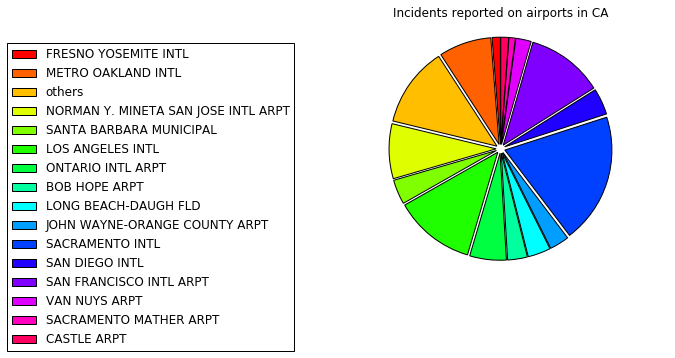

In [42]:
%matplotlib inline
import colorsys

df = dataFrame['AIRPORT'].value_counts()
others=0
list ={}
for val in df.keys():
    if df[val] < 100:
        others = others + df[val]
    else:
        list[val] = df[val] 
list['others'] = others

labels = list.keys()
i = 0
values = []
while i < len(list):
    values.append(list.get(labels[i]))
    i= i+1

explode = []
for k in labels:
    explode.append(0.05)

HSV_tuples = [(x*1.0/i, 1, 1) for x in range(i)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

patches, texts = plt.pyplot.pie(values,colors= RGB_tuples, explode=explode, startangle=90, radius=1.2)
plt.pyplot.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.pyplot.axis('equal')
plt.pyplot.title('Incidents reported on airports in CA\n')
plt.pyplot.show()

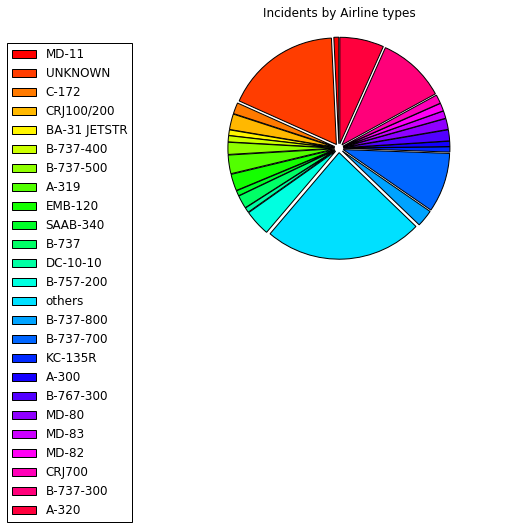

In [18]:
%matplotlib inline
import colorsys

df = dataFrame['ATYPE'].value_counts()
others=0
list ={}
for val in df.keys():
    if df[val] < 100:
        others = others + df[val]
    else:
        list[val] = df[val] 
list['others'] = others

labels = list.keys()
i = 0
values = []
while i < len(list):
    values.append(list.get(labels[i]))
    i= i+1

explode = []
for k in labels:
    explode.append(0.05)

HSV_tuples = [(x*1.0/i, 1, 1) for x in range(i)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

patches, texts = plt.pyplot.pie(values,colors= RGB_tuples, explode=explode, startangle=90, radius=1.2)
plt.pyplot.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.pyplot.axis('equal')
plt.pyplot.title('Incidents by Airline types\n')
plt.pyplot.show()

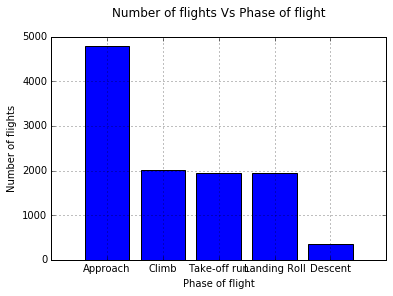

In [41]:
d = dataFrame['PHASE_OF_FLT'].value_counts()
d= d.head(5)
valList = []
for val in d.keys():
        valList.append(d[val])
plt.pyplot.bar(range(len(d)), valList, align='center')
plt.pyplot.xticks(range(len(d)), d.keys())
plt.pyplot.grid(True)
plt.pyplot.xlabel('Phase of flight')
plt.pyplot.ylabel('Number of flights')
plt.pyplot.title('Number of flights Vs Phase of flight\n')
plt.pyplot.show()